In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings

# Suppress the warning
warnings.filterwarnings('ignore')

Checking files in drive

In [ ]:
!ls drive/'MyDrive'/

'Colab Notebooks'


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

Reading the data

In [ ]:
df_phonedata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cell_Phones_and_Accessories_5.csv',dtype={'column_name': str})

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


DATA PRE-PROCESSING Converting unix review time to date-time format for better observation

In [ ]:
#Transforming unixReview time to date time format in phone data
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [ ]:
df_phonedata.head(2)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11


In [ ]:
df_phonedata.info() #checking for dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
df_phonedata.isnull().sum() #checking for null values

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

EDA

In [ ]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [ ]:
df_phonedata.isnull().sum()

overall                  0
verified                 0
reviewerID               0
asin                     0
style                    0
reviewerName            80
reviewText             435
summary                322
unixReviewTime           0
vote                557363
image               589137
review_sentiment         0
Date&Time                0
dtype: int64

In [ ]:
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True) #dropping the columns with more null values

In [ ]:
df_phonedata.isnull().sum()

overall               0
verified              0
reviewerID            0
asin                  0
style                 0
reviewerName         80
reviewText          435
summary             322
review_sentiment      0
Date&Time             0
dtype: int64

In [ ]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10
227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,I am very satisfied with this product! It came...,Very Nice Looking Item!,POSITIVE,2014-01-31


In [ ]:
df_phonedata.shape

(605241, 10)

In [ ]:
df_phonedata.describe()

,overall
count,605241.000000
mean,4.257537
std,1.198782
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# checking the description of numerical
df_phonedata.describe()

,overall
count,605241.000000
mean,4.257537
std,1.198782
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
def null_value(df_phonedata):
    missing = pd.DataFrame(columns=['features','percentage'])
    for col in df_phonedata.columns:
        if df_phonedata[col].isna().values.any() :
            percentage = round(df_phonedata[col].isna().sum()/len(df_phonedata.index)*100, 2)
            missing = missing.append({'features' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [ ]:
null_value(df_phonedata)

,features,percentage
0,reviewerName,0.01
1,reviewText,0.07
2,summary,0.05


In [ ]:
# check null percentage of dataframe
# df_nulls = null_value(df)
df_nulls = null_value(df_phonedata)
df_nulls.sort_values('percentage', ascending=False)


,features,percentage
1,reviewText,0.07
2,summary,0.05
0,reviewerName,0.01


If review text is null then its not going to usefull to perform sentiment analysis, so we will drop rows having reviewtext null

In [ ]:
# droping the rows with null counts
phonedata = df_phonedata[df_phonedata['reviewText'].notna()]

No null values found in the column

In [ ]:
# check null percentage of dataframe
Nulls_df = null_value(phonedata)
Nulls_df.sort_values('percentage', ascending=False)

,features,percentage
1,summary,0.05
0,reviewerName,0.01


<Axes: ylabel='Frequency'>

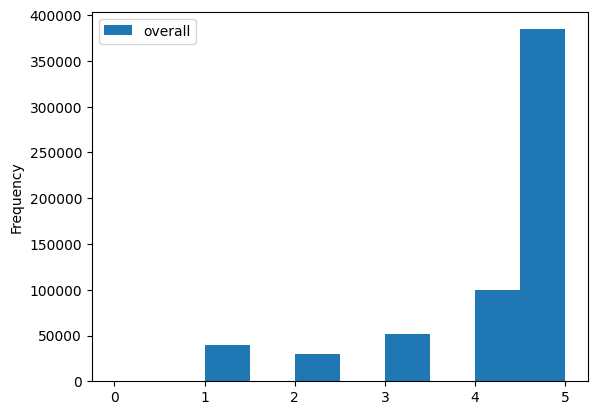

In [ ]:
phonedata.plot(kind='hist')

importing 2 nd dataset


In [ ]:
import gzip
import shutil

#Path to the meta data zip file 'meta_cell_phones_and_Accessories' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Colab Notebooks/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Colab Notebooks/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

Pre Processing for 2 nd dataset and EDA

In [ ]:
df_meta.head(3)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

In [ ]:
df_meta.shape

(590071, 18)

In [ ]:
df_meta.isnull().sum() #checking for null values

category        0
tech1           0
description     0
fit             0
title           0
also_buy        0
image           0
tech2           0
brand           0
feature         0
rank            0
also_view       0
details         0
main_cat        0
similar_item    0
date            0
price           0
asin            0
dtype: int64

In [ ]:
# checking null percentage of metaData
Meta_nulls = null_value(df_meta)
Meta_nulls.sort_values('percentage', ascending=False)
print(Meta_nulls)

Empty DataFrame
Columns: [features, percentage]
Index: []


In [ ]:
 #Checking null percentage of metaData
Meta_nulls = df_meta.isnull().mean().reset_index()
Meta_nulls.columns = ['Column', 'Null Percentage']
Meta_nulls = Meta_nulls.sort_values('Null Percentage', ascending=False)

print(Meta_nulls)

          Column  Null Percentage
0       category              0.0
1          tech1              0.0
16         price              0.0
15          date              0.0
14  similar_item              0.0
13      main_cat              0.0
12       details              0.0
11     also_view              0.0
10          rank              0.0
9        feature              0.0
8          brand              0.0
7          tech2              0.0
6          image              0.0
5       also_buy              0.0
4          title              0.0
3            fit              0.0
2    description              0.0
17          asin              0.0


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

In [ ]:
# need to drop category column as we already created new column category_new based of cell
df_meta.drop('category', axis=1, inplace= True)


In [ ]:
# Now checking the duplicate asin in metadata
len(df_meta[df_meta.duplicated('asin')])

715

In [ ]:
df_meta.head(2)

,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X


In [ ]:
# checking if rank has any blank value
len(df_meta[df_meta['rank']=='[]'])

0

In [ ]:
# checkin if feature has blank values
len(df_meta[df_meta['feature']=='[]'])

0

In [ ]:
df_meta.isnull().sum()/len(df_meta.index * 100)

tech1           0.0
description     0.0
fit             0.0
title           0.0
also_buy        0.0
image           0.0
tech2           0.0
brand           0.0
feature         0.0
rank            0.0
also_view       0.0
details         0.0
main_cat        0.0
similar_item    0.0
date            0.0
price           0.0
asin            0.0
dtype: float64

In [ ]:
df_meta.price.value_counts()

                  462507
$7.99               6293
$9.99               6204
$6.99               5131
$8.99               4384
                   ...  
$53.53                 1
$76.65                 1
$6.75 - $16.99         1
$229.12                1
$75.24                 1
Name: price, Length: 4669, dtype: int64

In [ ]:
 #impute null where price having descriptive text
df_meta["price"]=[np.nan if len(str(x))>15 else x for x in df_meta["price"]]

In [ ]:
df_meta['price'].value_counts()

           462507
$7.99        6293
$9.99        6204
$6.99        5131
$8.99        4384
            ...  
$45.22          1
$47.51          1
$47.28          1
$185.99         1
$75.24          1
Name: price, Length: 4653, dtype: int64

In [ ]:
# replace $ to none and convert price to float
df_meta["price"]= df_meta["price"].str.replace("$",'')

In [ ]:
# replace , to none
df_meta["price"]= df_meta["price"].str.replace(",",'')


In [ ]:
# converting price column from object dtype to numeric
df_meta['price']= pd.to_numeric(df_meta['price'], errors='coerce')

In [ ]:
# checking the overall null values in price column
df_meta["price"].isnull().sum()

465476

In [ ]:
# checking the brand wise null value
df_meta[df_meta["price"].isnull()]['brand'].value_counts()

                            12272
Generic                      9701
EMPIRE                       4648
MyBat                        4466
Unknown                      4143
                            ...  
The Mayan Star                  1
ZTE Z667, Zinger,Whirl 2        1
Lotusfalls                      1
High School of the Dead         1
HONGKONGRULY                    1
Name: brand, Length: 39728, dtype: int64

In [ ]:
df_meta['price'] = df_meta['price'].fillna(df_meta.groupby('brand')['price'].transform('mean'))


In [ ]:
df_meta.isnull().sum()/len(df_meta.index)*100

tech1            0.000000
description      0.000000
fit              0.000000
title            0.000000
also_buy         0.000000
image            0.000000
tech2            0.000000
brand            0.000000
feature          0.000000
rank             0.000000
also_view        0.000000
details          0.000000
main_cat         0.000000
similar_item     0.000000
date             0.000000
price           26.215828
asin             0.000000
dtype: float64

In [ ]:
# checking null percentage of metadata
Metadata_nulls = null_value(df_meta)
Metadata_nulls.sort_values('percentage', ascending=False)

,features,percentage
0,price,26.22


In [ ]:
df_meta.describe()

,price
count,4.353790e+05
mean,2.966827e+01
std,2.147966e+03
min,1.000000e-02
25%,6.504706e+00
50%,8.690000e+00
75%,1.399000e+01
max,1.000006e+06


merging data frame

In [ ]:
df_merged = pd.merge(phonedata, df_meta, how='inner', on=['asin'])

In [ ]:
df_merged.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,...,,ELEGANI,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,9.828750
1,4.0,True,AX8YW6N99IWPQ,7508492919,{'Color:': ' Bling'},eladia paz,Happy it,Four Stars,POSITIVE,2015-02-14,...,,ELEGANI,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,9.828750
2,3.0,True,A3P9BQ6A7EO0FN,7508492919,{'Color:': ' Bling'},Susan Holt,It was a very cute phone case.,Cute Case,POSITIVE,2015-01-27,...,,ELEGANI,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,9.828750
3,3.0,True,A2O0X4EJWLYR4W,7508492919,{'Color:': ' Bling'},Cara M Gelly,I didn't get the same case that's shown in the...,I didn't get the same case that's shown in the...,POSITIVE,2015-01-05,...,,ELEGANI,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,9.828750
4,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing. Fantastic long cord a...,Perfect works great,POSITIVE,2014-02-10,...,,Samsung,[],"[>#483,035 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,59.054194


In [ ]:
# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_merged["verified"].replace({False: 0, True: 1}, inplace=True)


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605024 entries, 0 to 605023
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           605024 non-null  float64
 1   verified          605024 non-null  int64  
 2   reviewerID        605024 non-null  object 
 3   asin              605024 non-null  object 
 4   style             605024 non-null  object 
 5   reviewerName      604944 non-null  object 
 6   reviewText        605024 non-null  object 
 7   summary           604733 non-null  object 
 8   review_sentiment  605024 non-null  object 
 9   Date&Time         605024 non-null  object 
 10  tech1             605024 non-null  object 
 11  description       605024 non-null  object 
 12  fit               605024 non-null  object 
 13  title             605024 non-null  object 
 14  also_buy          605024 non-null  object 
 15  image             605024 non-null  object 
 16  tech2             60

In [ ]:
# copied merged file for converting it to excel format
df_merged1 = df_merged.copy()

In [ ]:
len(df_merged1)


605024

In [ ]:
# counting positive and negative instances
pos_neg = df_merged1.review_sentiment.value_counts()
pos_neg

POSITIVE    479372
NEGATIVE    125652
Name: review_sentiment, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

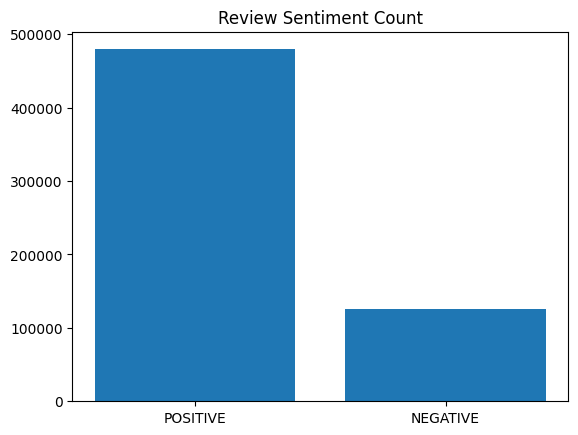

In [ ]:
import matplotlib.pyplot as plt

review_sentiment_counts = df_merged1['review_sentiment'].value_counts()

plt.title("Review Sentiment Count")
plt.bar(review_sentiment_counts.index, review_sentiment_counts.values)
plt.show()

In [ ]:
# display number of positive and negative reviews

neg  = pos_neg[1]
pos  = pos_neg[0]

print("No. of negative review: ", neg)
print("\nNo. of positive review: ", pos)
print("\nnegative review rate is about {0}%".format(
    round((neg/float(pos+neg))*100), 2))
print("\npositve review rate is about {0}%".format(
    round((pos/float(pos+neg))*100), 2))

No. of negative review:  125652

No. of positive review:  479372

negative review rate is about 21%

positve review rate is about 79%


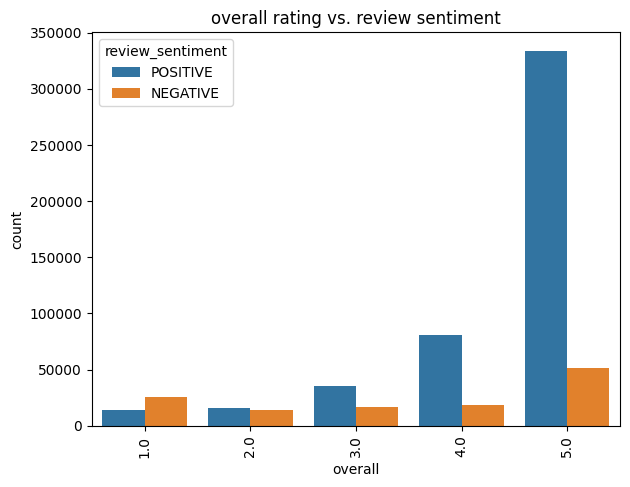

In [ ]:
plt.figure()
sns.countplot(data=df_merged1,x=df_merged["overall"],hue=df_merged1["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

From above plot we can say that positive reviews have high overall rating as expected , no any different pattern found. for rating 1 the negative reviews are more.

In [ ]:
# top 10 brand having more count of reviews
df_merged1['brand'].value_counts()[:10]

Spigen       29927
OtterBox     23905
Samsung      22854
Anker        21158
Generic      12647
SUPCASE      10256
i-Blason      9129
BLU           8535
Motorola      6627
Caseology     6626
Name: brand, dtype: int64

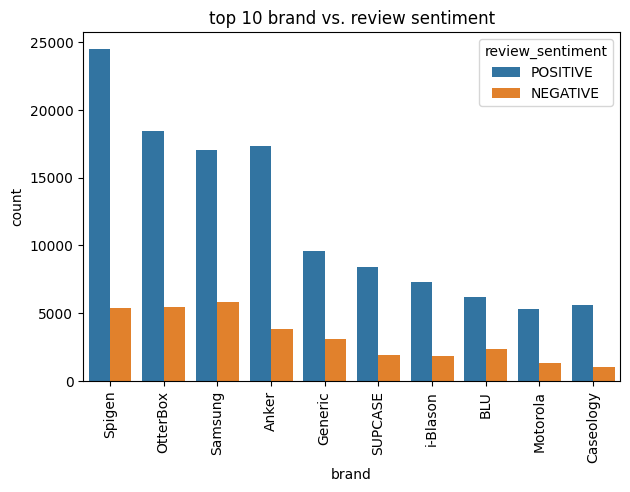

In [ ]:
plt.figure()
sns.countplot(data=df_merged1,x=df_merged1["brand"],hue=df_merged1["review_sentiment"],order=df_merged1["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()


In [ ]:
df_merged1["verified"].value_counts()

1    530810
0     74214
Name: verified, dtype: int64

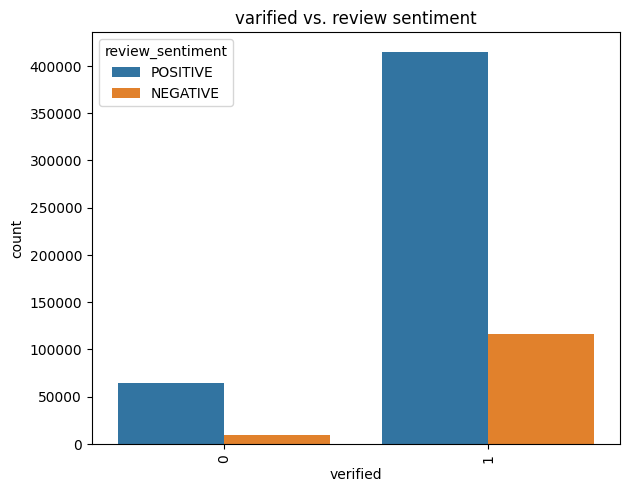

In [ ]:
plt.figure()
sns.countplot(data=df_merged1,x=df_merged1["verified"],hue=df_merged1["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("varified vs. review sentiment")
plt.show()

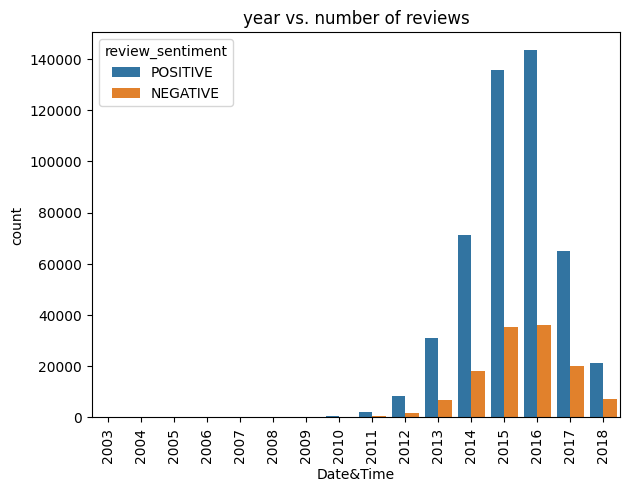

In [ ]:
plt.figure()
sns.countplot(data=df_merged1,x=pd.DatetimeIndex(df_merged1['Date&Time']).year,hue=df_merged1["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("year vs. number of reviews")
plt.show()

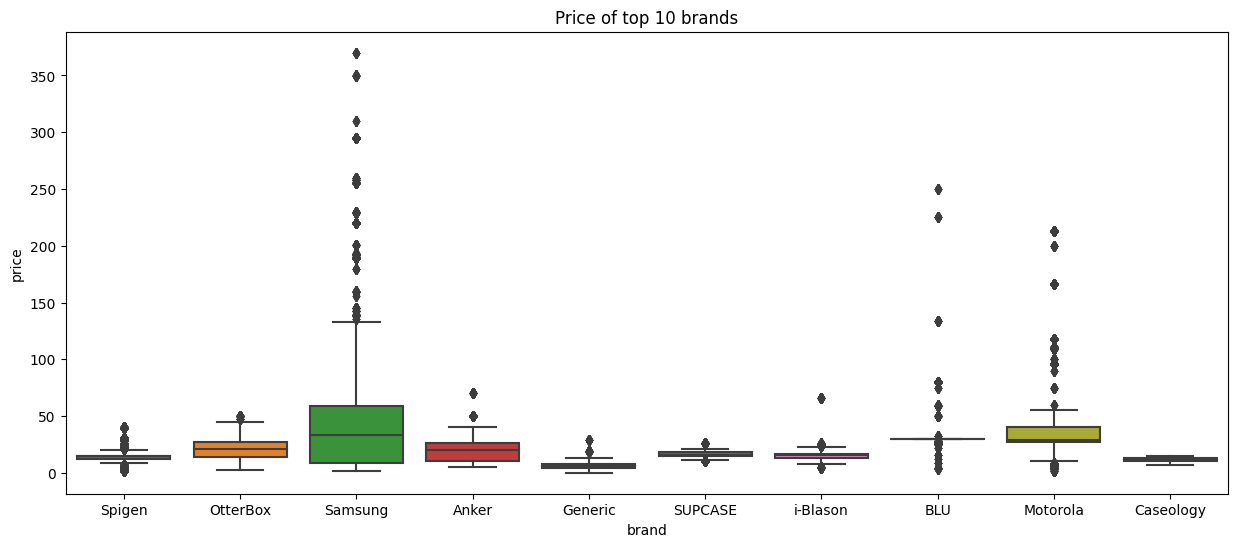

In [ ]:
plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged1["brand"].value_counts().iloc[:10].index)
plt.show()

In [ ]:
df_merged1["price"].value_counts()

9.990000      28570
7.990000      23575
8.990000      15710
12.990000     14044
5.990000      12321
              ...  
3.040000          1
9.898333          1
272.980000        1
18.336000         1
21.818333         1
Name: price, Length: 2585, dtype: int64

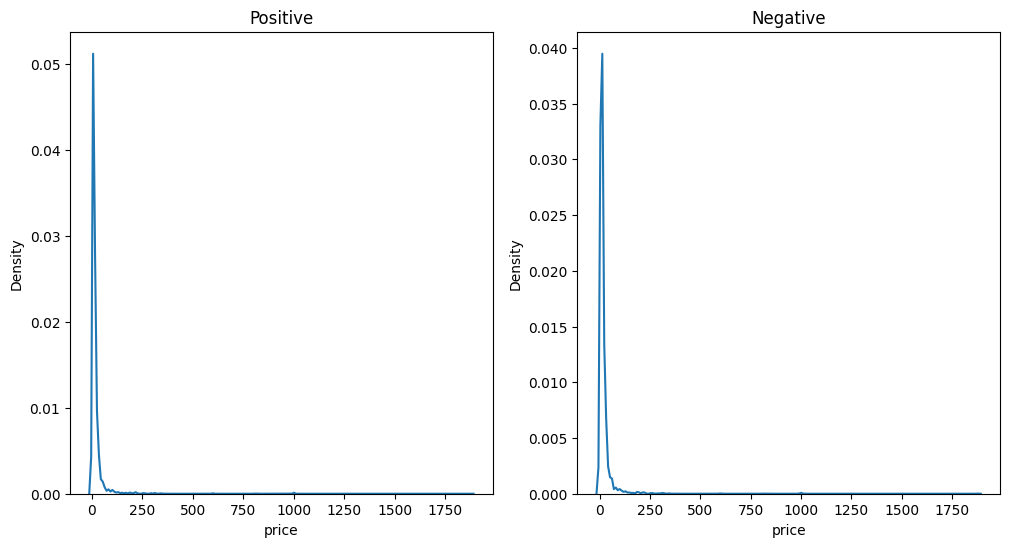

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Positive")
ax2 = fig.add_subplot(1, 2, 2, title="Negative")

sns.kdeplot(df_merged1[df_merged1["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_merged1[df_merged1["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()

In [ ]:
df_merged.to_csv('/content/drive/MyDrive/Colab Notebooks/merged.csv',escapechar='\\')
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged.csv')

In [ ]:
df.dtypes

Unnamed: 0            int64
overall             float64
verified              int64
reviewerID           object
asin                 object
style                object
reviewerName         object
reviewText           object
summary              object
review_sentiment     object
Date&Time            object
tech1                object
description          object
fit                  object
title                object
also_buy             object
image                object
tech2                object
brand                object
feature              object
rank                 object
also_view            object
details              object
main_cat             object
similar_item         object
date                 object
price               float64
dtype: object

In [ ]:
df1=df

In [ ]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
df1.to_excel("/content/drive/MyDrive/Colab Notebooks/for_tableau.xlsx", engine='xlsxwriter')

In [ ]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

Text Analysis

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Colab Notebooks/stop_words_long.txt')]

In [ ]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)

  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df

In [ ]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0).
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1
    return 0

In [ ]:
df=clean_dataframe(df)

In [ ]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [ ]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english")
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [ ]:
df['reviewText']=df['reviewText'].astype('str')

In [ ]:
df=text_process(df)

In [ ]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

In [ ]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/final_tab.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis

In [ ]:
df.head(3)

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,tech1,fit,also_buy,image,...,feature,rank,also_view,details,similar_item,date,price,classes,y,cleaned_reviews
0,5.0,A24E3SXTC62LJI,looks even better in person be careful to not ...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,positive,2,look even better person care drop phone often ...
1,4.0,AX8YW6N99IWPQ,happy it,Four Stars,POSITIVE,2015-02-14,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,positive,2,happi
2,3.0,A3P9BQ6A7EO0FN,it was a very cute phone case,Cute Case,POSITIVE,2015-01-27,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,['Fashionable with unique 3D butterfly design ...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,neutral,1,cute phone case


Distribution of sentiment analysis across the dataset

In [ ]:
#importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

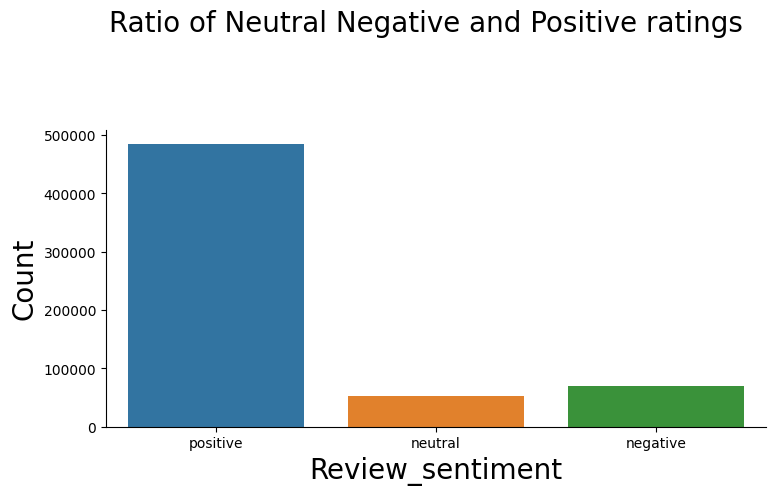

In [ ]:
#Distribution of sentiment across the dataset
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Review_sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [ ]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 8.56147855291691 %
Percentage of negative words in train --> 11.385829322473159 %
Percentage of positive words in train --> 80.05269212460993 %


In [ ]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

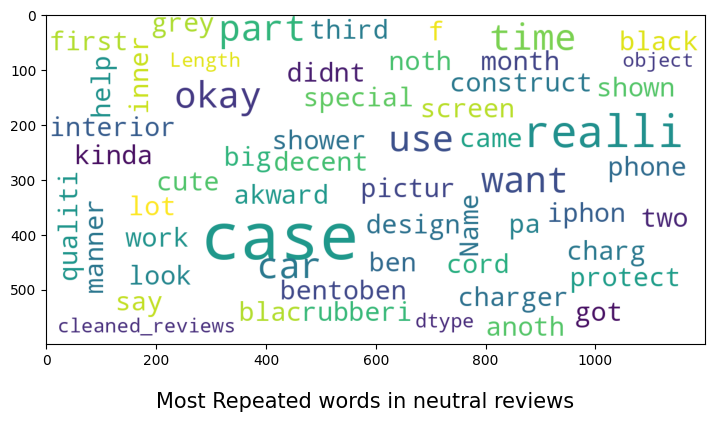

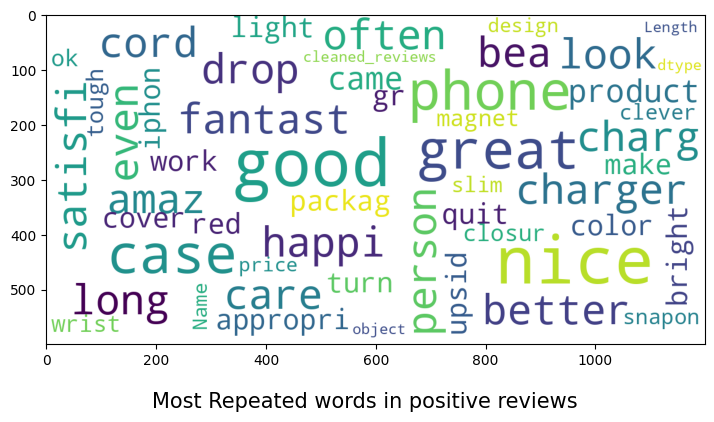

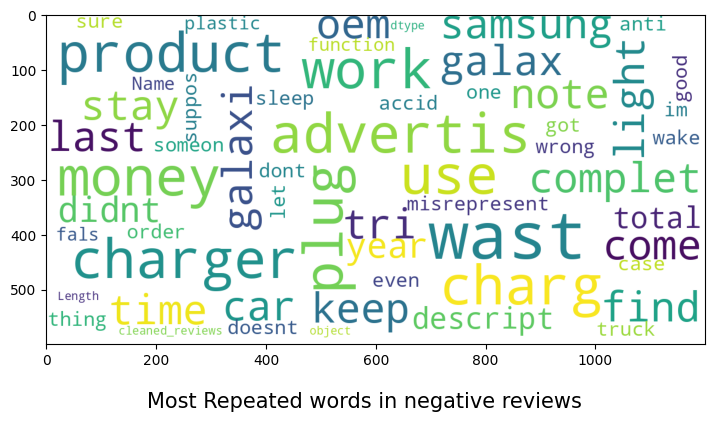

In [ ]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [ ]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

def n_gram_plot(data, title, color):
    x = [x[0] for x in data]
    y = [x[1] for x in data]
    sns.barplot(x=x, y=y, color=color)
    plt.title('{} Reviews Bigrams'.format(title), fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.show()


In [120]:
#The above Bigrams shows the sentiment review analysis of all aspects of the brands

In [121]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,tech1,fit,also_buy,image,...,rank,also_view,details,similar_item,date,price,classes,y,cleaned_reviews,sentiment
0,5.0,A24E3SXTC62LJI,looks even better in person be careful to not ...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,positive,2,look even better person care drop phone often ...,0.2
1,4.0,AX8YW6N99IWPQ,happy it,Four Stars,POSITIVE,2015-02-14,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,positive,2,happi,0.0
2,3.0,A3P9BQ6A7EO0FN,it was a very cute phone case,Cute Case,POSITIVE,2015-01-27,NaN,NaN,[],['https://images-na.ssl-images-amazon.com/imag...,...,"['>#228,544 in Cell Phones & Accessories (See ...",[],{},NaN,NaN,9.82875,neutral,1,cute phone case,0.5


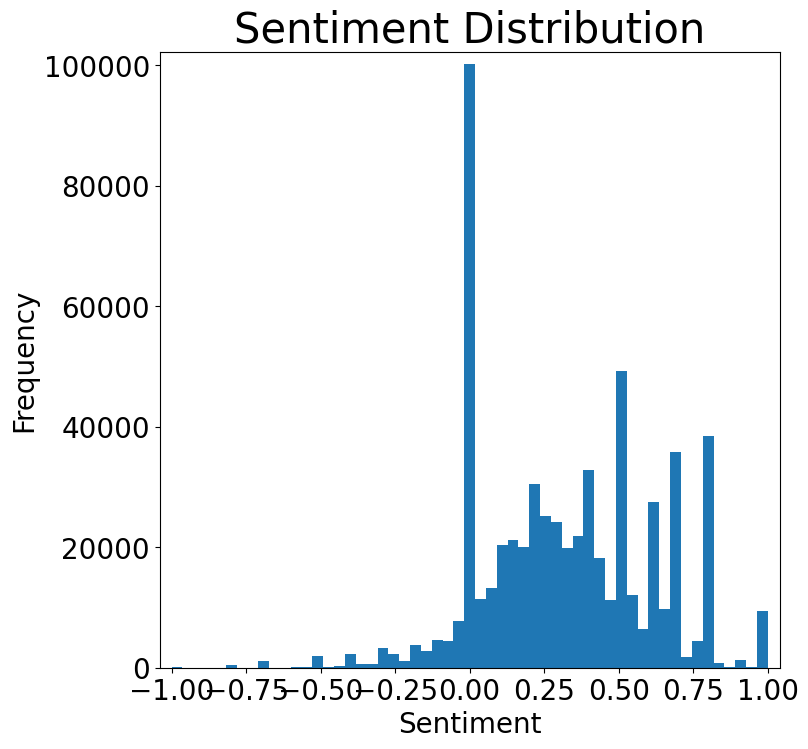

In [122]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

In [ ]:
#We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

In [ ]:
#It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones.

<Axes: >

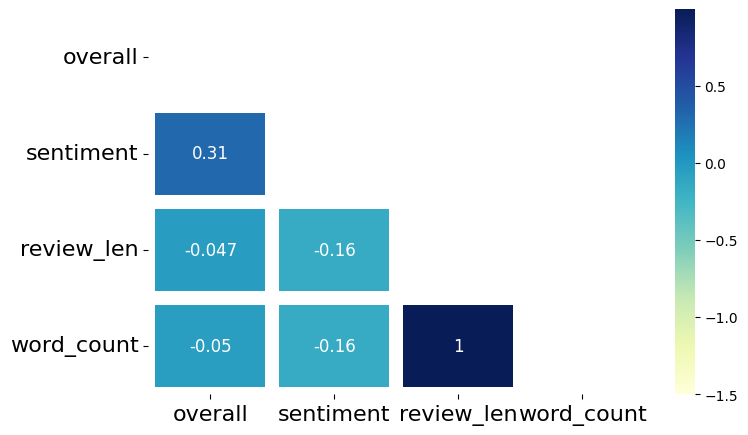

In [123]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

<Axes: >

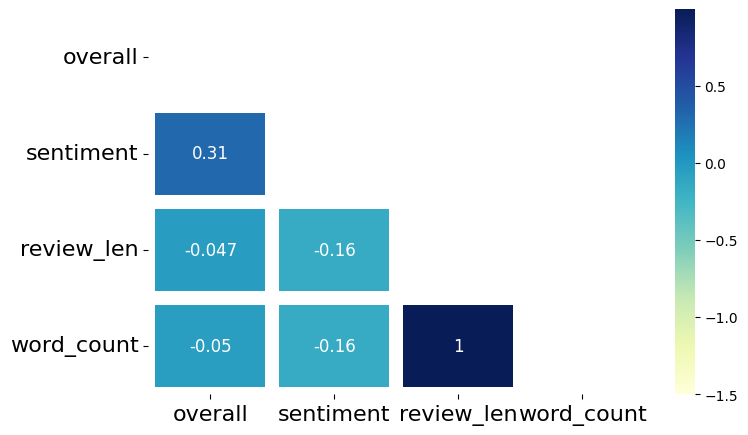

In [124]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code...

# Now you can use the tfidf_vectorizer and counter_vectorizer objects
tfidf_vectorizer = TfidfVectorizer(min_df=3, sublinear_tf=True, norm='l2', ngram_range=(1, 1))
counter_vectorizer = CountVectorizer(ngram_range=(1, 1))


In [127]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code...

# Create Model Pipelines for various models
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer), ('chi', SelectKBest(chi2, k=1200)), ('clf', RandomForestClassifier())])
# text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer), ('chi', SelectKBest(chi2, k=2890)), ('clf', MultinomialNB(alpha=11))])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer), ('chi', SelectKBest(chi2, k=2890)), ('clf', BernoulliNB(alpha=11))])

# Continue with the rest of your code...


In [130]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

In [131]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

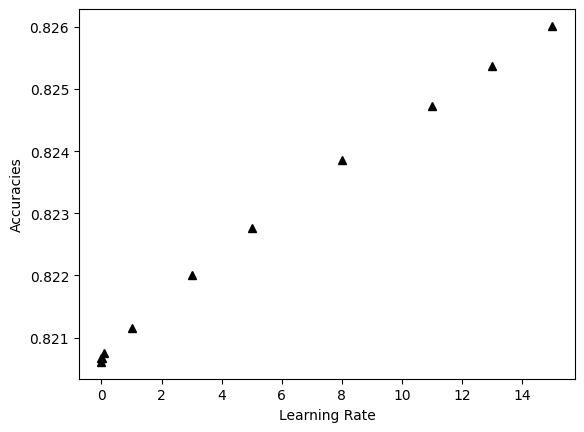

[0.8206090117843863, 0.8206669813586412, 0.8206669813586412, 0.8207497950361482, 0.8211473006881816, 0.8220002815665035, 0.8227704487673184, 0.8238635893104105, 0.8247331329242338, 0.8253790796087882, 0.826016744925592]


In [132]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [133]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x787048636320>)),
                ('clf', MultinomialNB(alpha=11))])
0.8247331329242338


In [134]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x787048636320>)),
                ('clf', BernoulliNB(alpha=11))])
0.7640224259438689


In [143]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [145]:
def your_text_processing_function(text):
    # Your text processing code goes here
    # For example, you can tokenize, remove stopwords, and perform other text cleaning operations.
    # Return the cleaned version of the text
    cleaned_text = text.lower()  # Placeholder example, replace with your actual text processing logic
    return cleaned_text
prediction("works good, viewing angle critical for good picture,the size was perfect for the location")


2

In [146]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_result_for_capstone.csv')